<a href="https://colab.research.google.com/github/alibakh62/DeepFake-Kaggle/blob/master/notebook/colab/DeepFake_FaceDetection_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro: Using face detection 

It seems like most of manipulations are around the face area. So, we don't need the rest of frame. We just need to crop the face(s) out of the video frames.

This will reduce the size of input data, make training faster. 

Also, hopefully, the model will focus only on the part of video that matters and yield better results.

**GOAL**

In this notebook, we create a new training/valid/test data sets which only contains faces cropped out of video frames.



# Configs and Imports

In [8]:
!pip install ipython-autotime

time: 2.85 s


In [5]:
%load_ext autotime
%tensorflow_version 2.x
%matplotlib inline 

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import os
import shutil
from glob import glob
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import cv2 as cv

In [8]:
MODELS_FOLDER = '/content/drive/My Drive/DeepFake/models'
BASE_FOLDER = '/content/drive/My Drive/DeepFake'
TRAIN_SAMPLE_VIDEOS = 'train_sample_videos'
TEST_VIDEOS = 'test_videos'
TRAIN_FRAMES_FOLDER = 'train_frames'
VALID_FRAMES_FOLDER = 'valid_frames'
TEST_FRAMES_FOLDER = 'test_frames'
DATA_FOLDER = 'data'
TRAIN_FOLDER = 'train'
VALID_FOLDER = 'valid'
TEST_FOLDER = 'test'
TRAIN_FACE = 'train_face'
VALID_FACE = 'valid_face'
TEST_FACE = 'test_face'
INPUT_SHAPE = (224, 224)
BATCH_SIZE = 32

time: 6.24 ms


# Extracting Faces

## Setup

In [6]:
import dlib
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

detector = dlib.get_frontal_face_detector()

time: 409 ms


## Creating directories

In [9]:
data_dir = os.path.join(BASE_FOLDER, DATA_FOLDER)

# train face folder
train_dir = os.path.join(data_dir, TRAIN_FACE)
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(os.path.join(train_dir, 'REAL')):
    os.mkdir(os.path.join(train_dir, 'REAL'))

if not os.path.isdir(os.path.join(train_dir, 'FAKE')):
    os.mkdir(os.path.join(train_dir, 'FAKE'))

# valid face folder
valid_dir = os.path.join(data_dir, VALID_FACE)
if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

if not os.path.isdir(os.path.join(valid_dir, 'REAL')):
    os.mkdir(os.path.join(valid_dir, 'REAL'))

if not os.path.isdir(os.path.join(valid_dir, 'FAKE')):
    os.mkdir(os.path.join(valid_dir, 'FAKE'))

# test face folder
test_dir = os.path.join(data_dir, TEST_FACE)
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

time: 34.8 ms


### Functions

In [0]:
def rect_to_bb(rect):
    """
       take a bounding predicted by dlib and convert it
       to the format (x, y, w, h) as we would normally do
       with OpenCV
    """
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def walkdir(dirpath):
    for root, dirs, files in os.walk(dirpath):
        for name in files:
            if name != 'metadata.json':
                yield os.path.abspath(os.path.join(dirpath, name)), name

In [0]:
filescount = meta_train_df.index.nunique()
traincount = int(filescount * train_val_split)

cnt = 1
for path, name in tqdm_notebook(walkdir(os.path.join(BASE_FOLDER, TRAIN_INPUT, input_folder_name)), total=filescount):
    cap = cv.VideoCapture(path)
    if cnt <= traincount:
        dirname = os.path.join(DATA_FOLDER, TRAIN_FOLDER)
    else:
        dirname = os.path.join(DATA_FOLDER, VALID_FOLDER)
    get_frames(cap, name, dirname)
    cnt += 1

image shape: (1080, 1920, 3)
2 faces detected on the image
0 1169 174 179 179


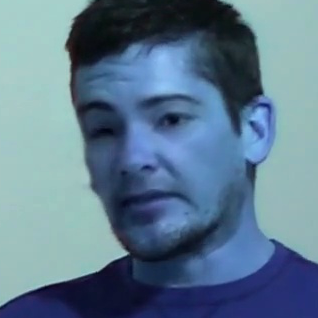

1 526 244 150 150


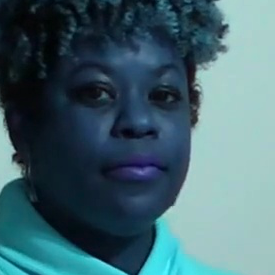

time: 2.45 s


In [0]:
detector = dlib.get_frontal_face_detector()

img = dlib.load_rgb_image('/content/drive/My Drive/DeepFake/data/train/FAKE/bqnymlsayl_frame9.jpg')
print(f"image shape: {img.shape}")

# print count of detected faces
faces = detector(image_array, 1)
print(f"{len(faces)} faces detected on the image")

# cropped image
rects, scores, idx = detector.run(image_array, 0)

def rect_to_bb(rect):
    """
       take a bounding predicted by dlib and convert it
       to the format (x, y, w, h) as we would normally do
       with OpenCV
    """
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

# loop over the face detections
for (i, rect) in enumerate(rects):
    """
       determine the facial landmarks for the face region, then
       convert the landmark (x, y)-coordinates to a NumPy array
    """
    (x, y, w, h) = rect_to_bb(rect)
    print(i, x, y, w, h)

    # fname = '{}_{}.{}'.format(name, i, ext)
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = img.copy()
    cv.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)
    startX = x
    startY = y - 15 if y - 15 > 15 else y + 15
    cv.putText(clone, str(i), (startX, startY),
                cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    roi = img[(y - 50):(y + int(1.5*h)), (x - 50):(x + int(1.5*w))]
    cv2_imshow(roi)
    # cv2.imwrite(fname, roi)
    # cv2_imshow(clone)
    cv.waitKey(0)

In [0]:
detector = dlib.get_frontal_face_detector()

image_array = dlib.load_rgb_image('/content/drive/My Drive/DeepFake/data/train/FAKE/bqnymlsayl_frame9.jpg')

# print count of detected faces
faces = detector(image_array, 1)
print(f"{len(faces)} faces detected on the image")

# cropped image
rects, scores, idx = detector.run(image_array, 0)
for i, d in enumerate(rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    crop_img = image_array[y1:y2, x1:x2]

cv2_imshow(crop_img)

In [0]:
img = image.load_img('/content/drive/My Drive/DeepFake/data/train/FAKE/aagfhgtpmv_frame1.jpg')
img = image.img_to_array(img)
cv2_imshow(img)

In [0]:
img = image.load_img('/content/drive/My Drive/DeepFake/data/train/FAKE/aagfhgtpmv_frame1.jpg')
img = image.img_to_array(img)
print(img.shape)
crop_img = []
face_rects, scores, idx = detector.run(img, 0)
for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    crop_img = img[y1:y2, x1:x2]

cv2_imshow(crop_img)

(1080, 1920, 3)


RuntimeError: ignored

time: 80.2 ms


In [0]:
cap = cv.VideoCapture(os.path.join(BASE_FOLDER, DATA_FOLDER, 'test_videos/jzmzdispyo.mp4'))
ret, frame = cap.read()
print(frame)
img_ = image.img_to_array(frame)
cv2_imshow(frame)

None


ValueError: ignored

time: 28.4 ms
